In [1]:
import numpy as np
import mne
%matplotlib inline
import matplotlib.pyplot as plt
import scipy 
from scipy.stats import hmean,trim_mean
import pandas as pd

In [2]:
import seaborn as sns

C:\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
df = pd.read_csv('suj28_l2nap_day1_100ms.csv')
df.head()

,time,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,...,P2,CPz,CP4,TP8,C6,C2,FC4,FT8,F6,F2
0,0,11607.189936,14893.280850,15708.377604,1512.585225,6591.296067,-898.787251,18075.431582,16503.607833,13248.552848,...,19619.810818,20210.998224,16981.732797,3983.475638,21690.807722,6378.633979,17877.619873,1655.989342,-1911.685458,16699.364974
1,100,11555.578653,15299.300894,15693.479940,1436.988655,6829.300896,-1011.861941,18168.177774,16772.396012,13415.294053,...,19748.022261,20310.568130,17048.662575,3809.184469,21818.078421,6353.064430,18072.641849,1576.326706,-1874.566798,16210.705241
2,200,11540.766520,15416.880237,15683.965824,1412.987570,6884.302009,-1041.261801,18190.168586,16843.484548,13460.361477,...,19777.992983,20333.166334,17063.569609,3765.031605,21847.284388,6344.277508,18118.784003,1554.908005,-1870.197107,16095.181204
3,300,11512.506610,15604.173968,15673.798529,1376.670943,7001.180145,-1100.937336,18231.458615,16965.471244,13537.960218,...,19839.064039,20381.218309,17094.423257,3671.677613,21905.517271,6329.353178,18212.366861,1512.629428,-1858.585829,15858.023247
4,400,11517.604170,15520.944267,15677.104511,1387.739775,6962.857434,-1087.945724,18217.714150,16920.458397,13501.012309,...,19815.927383,20364.087903,17081.147297,3694.949214,21884.120521,6331.899204,18181.946706,1522.776348,-1860.484833,15916.993788


In [4]:
print('2')

2


In [11]:
df2 = pd.read_csv('spindle_detection_suj28.txt')
df2.head()

,Amplitude,Duration,Onset,Annotation
0,7.905970,1.102,695.810,auto spindle
1,6.556632,0.804,707.352,auto spindle
2,6.698177,0.590,714.432,auto spindle
3,6.947769,0.862,717.776,auto spindle
4,10.665980,1.330,729.534,auto spindle


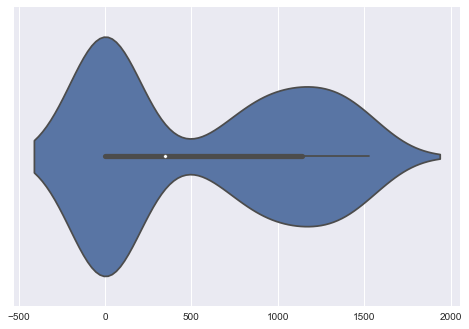

In [15]:
sns.violinplot([df2.Duration,df2.Onset])

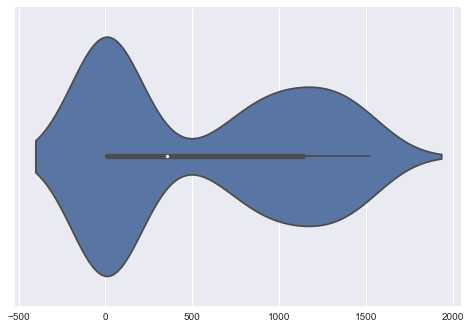

In [17]:
sns.violinplot([df2.Amplitude,df2.Onset])

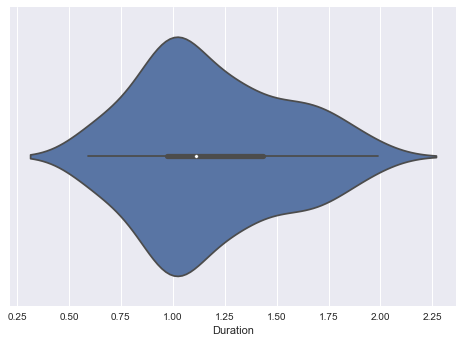

In [36]:
ax = sns.violinplot(x=df2["Duration"])

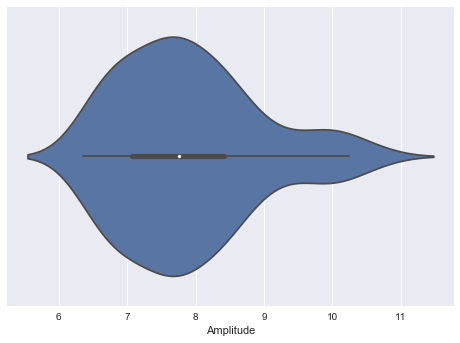

In [38]:
ax = sns.violinplot(x=df2["Amplitude"])

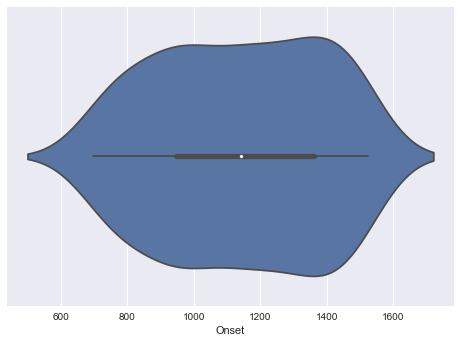

In [39]:
ax = sns.violinplot(x=df2["Onset"])

In [24]:
# http://bl.ocks.org/d3noob/7030f35b72de721622b8
# You can add a button in d3js to update the data set based on the intervals set just like the example in the bottom in python
# I use the subject dataframe and use DataFrame.loc[#:#] in which the first number is the initial point of the index and the 
# second # is the final point

# In this example I tell pandas to return the row 1 to 100 (This is 10 seconds since 100 = 0.1 sec) out of 18076 of 
#the original dataframe
time = df.loc[1:100]
time

,time,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,...,P2,CPz,CP4,TP8,C6,C2,FC4,FT8,F6,F2
1,100,11555.578653,15299.300894,15693.479940,1436.988655,6829.300896,-1011.861941,18168.177774,16772.396012,13415.294053,...,19748.022261,20310.568130,17048.662575,3809.184469,21818.078421,6353.064430,18072.641849,1576.326706,-1874.566798,16210.705241
2,200,11540.766520,15416.880237,15683.965824,1412.987570,6884.302009,-1041.261801,18190.168586,16843.484548,13460.361477,...,19777.992983,20333.166334,17063.569609,3765.031605,21847.284388,6344.277508,18118.784003,1554.908005,-1870.197107,16095.181204
3,300,11512.506610,15604.173968,15673.798529,1376.670943,7001.180145,-1100.937336,18231.458615,16965.471244,13537.960218,...,19839.064039,20381.218309,17094.423257,3671.677613,21905.517271,6329.353178,18212.366861,1512.629428,-1858.585829,15858.023247
4,400,11517.604170,15520.944267,15677.104511,1387.739775,6962.857434,-1087.945724,18217.714150,16920.458397,13501.012309,...,19815.927383,20364.087903,17081.147297,3694.949214,21884.120521,6331.899204,18181.946706,1522.776348,-1860.484833,15916.993788
5,500,11550.854266,15343.360545,15700.311551,1428.662396,6866.197889,-1032.051407,18191.638334,16816.444611,13429.019276,...,19772.623999,20333.458816,17066.397773,3782.724438,21844.368447,6355.526193,18115.408587,1571.255540,-1847.748420,16113.794294
6,600,11624.342274,15079.841104,15759.565025,1509.981191,6731.375646,-914.757021,18159.143284,16662.166407,13341.820077,...,19718.412476,20293.070177,17056.220490,3954.540930,21799.814965,6408.398408,18015.747180,1663.756182,-1817.381028,16453.531062
7,700,11700.544140,14833.023360,15821.241790,1594.986962,6613.008080,-795.532553,18127.361789,16512.947944,13270.043502,...,19671.557601,20257.514756,17049.425266,4122.660569,21761.950086,6461.567093,17921.651126,1753.818078,-1790.665663,16789.455086
8,800,11726.635403,14704.993423,15846.110081,1631.783760,6566.971006,-744.292763,18105.550300,16435.352112,13237.035133,...,19646.940950,20235.333493,17039.900568,4191.170470,21738.788639,6480.183097,17870.181580,1784.394679,-1799.585311,16937.171245
9,900,11718.698885,14728.919028,15876.467363,1634.234317,6647.842828,-752.181100,18133.316023,16474.218217,13271.101347,...,19697.275746,20271.200101,17078.152683,4168.543711,21779.974336,6496.637964,17925.482327,1780.427724,-1798.910858,16834.028908
10,1000,11711.965857,14854.900612,15895.845668,1620.634504,6736.255110,-767.089121,18174.421241,16559.158794,13336.572862,...,19760.965205,20318.551010,17127.095487,4138.481603,21834.949740,6511.951741,18002.445085,1776.946338,-1787.933182,16713.608452
